In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
mat_data = loadmat("Data/ex3data1.mat")
data = mat_data['X']
label = mat_data['y']
print(data.shape, label.shape)
label = np.where(label==10,0,label)
np.unique(label, return_counts = True)

(5000, 400) (5000, 1)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500], dtype=int64))

In [3]:
new_data = np.hstack((label, data))
np.random.shuffle(new_data)
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(new_data, shuffle = True, stratify = new_data[:,0])

train_y, train_x = train_data[:,0], train_data[:,1:]
print(np.unique(train_y, return_counts = True))
test_y, test_x = test_data[:,0], test_data[:,1:]
print(np.unique(test_y, return_counts = True))
m, n = train_x.shape[0], test_x.shape[0]

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), array([375, 375, 375, 375, 375, 375, 375, 375, 375, 375], dtype=int64))
(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), array([125, 125, 125, 125, 125, 125, 125, 125, 125, 125], dtype=int64))


In [4]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        # Display Image
        h = ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                      cmap='Greys', extent=[0, 1, 0, 1])

        ax.axis('off')

The Actual Value is :  0.0  Predicted value is :  0.0
The Actual Value is :  3.0  Predicted value is :  3.0


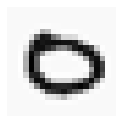

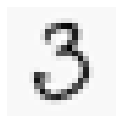

In [5]:
def print_data(data, label, Actval, size, print_val, figsize):
    for i in range(print_val):
        ind = np.random.randint(size)
        print("The Actual Value is : ", Actval[ind], " Predicted value is : ",label[ind])
        displayData(data[ind], figsize = figsize)
    
print_data(train_x, train_y, train_y, m, 2, (2,2))

In [6]:
def one_hot_encode(data,categ):
    new_label = []
    for i in range(categ):
        new_label.append(np.where(data!=i, 0, 1))
    new_label = np.array(new_label).T
    np.unique(new_label[0],return_counts=True)
    return new_label

In [7]:
train_y = one_hot_encode(train_y, 10)
print(train_y.shape)
test_y = one_hot_encode(test_y, 10)
print(test_y.shape)

(3750, 10)
(1250, 10)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf

model = Sequential()
model.add(layers.Input(400))
model.add(layers.Dense(128, activation = tf.nn.relu))
model.add(layers.Dense(32, activation = tf.nn.relu))
model.add(layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['acc'])
history = model.fit( train_x, train_y, validation_split=0.33, epochs=100, batch_size=100, shuffle = 1000)

W0924 10:42:40.290461  2268 deprecation.py:506] From C:\Users\naoggu\Python\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 2512 samples, validate on 1238 samples
Epoch 1/100
2512/2512 [==============================] - 0s 93us/sample - loss: 1.8074 - acc: 0.4996 - val_loss: 1.2178 - val_acc: 0.7124
Epoch 2/100
2512/2512 [==============================] - 0s 25us/sample - loss: 0.8733 - acc: 0.7874 - val_loss: 0.6736 - val_acc: 0.8288
Epoch 3/100
2512/2512 [==============================] - 0s 26us/sample - loss: 0.5594 - acc: 0.8455 - val_loss: 0.5042 - val_acc: 0.8659
Epoch 4/100
2512/2512 [==============================] - 0s 25us/sample - loss: 0.4156 - acc: 0.8921 - val_loss: 0.4272 - val_acc: 0.8821
Epoch 5/100
2512/2512 [==============================] - 0s 25us/sample - loss: 0.3365 - acc: 0.9164 - val_loss: 0.3749 - val_acc: 0.8998
Epoch 6/100
2512/2512 [==============================] - 0s 25us/sample - loss: 0.2901 - acc: 0.9271 - val_loss: 0.3486 - val_acc: 0.9055
Epoch 7/100
2512/2512 [==============================] - 0s 25us/sample - loss: 0.2468 - acc: 0.9399 - val_loss: 0.3244 - va

2512/2512 [==============================] - 0s 25us/sample - loss: 0.0039 - acc: 1.0000 - val_loss: 0.2992 - val_acc: 0.9330
Epoch 60/100
2512/2512 [==============================] - 0s 26us/sample - loss: 0.0038 - acc: 1.0000 - val_loss: 0.3004 - val_acc: 0.9313
Epoch 61/100
2512/2512 [==============================] - 0s 23us/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 0.3018 - val_acc: 0.9321
Epoch 62/100
2512/2512 [==============================] - 0s 25us/sample - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3085 - val_acc: 0.9305
Epoch 63/100
2512/2512 [==============================] - 0s 24us/sample - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3045 - val_acc: 0.9330
Epoch 64/100
2512/2512 [==============================] - 0s 24us/sample - loss: 0.0032 - acc: 1.0000 - val_loss: 0.3039 - val_acc: 0.9305
Epoch 65/100
2512/2512 [==============================] - 0s 24us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 0.3065 - val_acc: 0.9313
Epoch 66/100
2512/2512 [================

        loss       acc  val_loss   val_acc
10  0.156599  0.960987  0.299572  0.923263
11  0.141925  0.967357  0.277349  0.922456
12  0.128713  0.967357  0.279010  0.924071
13  0.118498  0.974124  0.266777  0.928110
14  0.108776  0.976911  0.265534  0.924879
15  0.094683  0.982086  0.265616  0.927302
16  0.085580  0.984076  0.263276  0.925687
17  0.077449  0.985669  0.272276  0.925687
18  0.068539  0.987659  0.263956  0.929725
19  0.063432  0.989252  0.261589  0.923263
The Actual Value is :  6  Predicted value is :  6
The Actual Value is :  6  Predicted value is :  6
The Actual Value is :  0  Predicted value is :  0
The Actual Value is :  2  Predicted value is :  2
The Actual Value is :  7  Predicted value is :  7


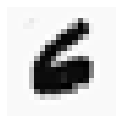

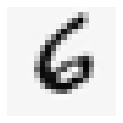

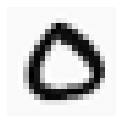

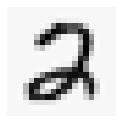

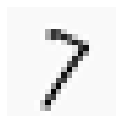

In [12]:
import pandas as pd
print(pd.DataFrame(history.history)[10:20])

predictions = np.argmax(model.predict(test_x), axis = 1)
print_data(test_x, predictions, np.argmax(test_y, axis = 1), n, 5, (2,2))